In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
driving_data = pd.read_csv('./340742548_T_NPTS_PERSON_1995(1).csv')

In [4]:
print(driving_data.shape)

(95360, 179)


In [5]:
driving_data.columns

Index(['HOUSEID', 'PERSONID', 'PROXY', 'R_AGEFLG', 'REF_ROST', 'R_AGE',
       'R_SEX', 'R_RELAT', 'DRIVER', 'DTCONJ',
       ...
       'WTINDMAN', 'WTINDTRN', 'WTINDWHL', 'WTINDRET', 'WTINDFIN', 'WTINDSVC',
       'WORKLOC', 'YEARMIL2', 'YEAR', 'HHCMSA_NM'],
      dtype='object', length=179)

The age distribution looks normal. The dataset has the expected number of counts (individuals surveyed)

In [6]:
driving_data.R_AGE.describe()

count    95360.000000
mean        38.462060
std         20.626037
min          5.000000
25%         22.000000
50%         38.000000
75%         53.000000
max         88.000000
Name: R_AGE, dtype: float64

There are two genders as expected

In [7]:
driving_data.R_SEX.describe()

count    95360.000000
mean         1.526437
std          0.499303
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: R_SEX, dtype: float64

In [8]:
driving_data.R_SEX.value_counts()
#gender data looks good

2    50201
1    45159
Name: R_SEX, dtype: int64

I examined the YEARMILE column and found that it contained spurious valueas  in the 999990's that skewed the average mileage up.

In [11]:
driving_data.YEARMILE[driving_data.DRIVER==2].value_counts()
#when a non-driver was included, the YEARMILE values entered were predominantly the weird 99999x values

999994    25079
999998      279
1000          2
100           2
15000         1
13000         1
7000          1
35000         1
40000         1
800           1
0             1
Name: YEARMILE, dtype: int64

In [12]:
driving_data.YEARMILE.describe()

count     95360.000000
mean     319399.831449
std      457238.852565
min           0.000000
25%        7000.000000
50%       15000.000000
75%      999994.000000
max      999999.000000
Name: YEARMILE, dtype: float64

In [13]:
driving_data.YEARMILE.mode()

0    999994
dtype: int64

I got a feeling for how many spurious values there were.

In [16]:
(driving_data.YEARMILE > 200000).value_counts()

False    65718
True     29642
Name: YEARMILE, dtype: int64

In [17]:
driving_data.YEARMILE[(driving_data.YEARMILE < 999000) & (driving_data.YEARMILE > 199999)].value_counts()
#yes, the YEARMILE is capped at 200000 as expected (says so in survey info)

200000    46
Name: YEARMILE, dtype: int64

I determined how man values would result from filtering out the 999 999's and what the data looked like.

In [19]:
(driving_data.YEARMILE < 200001).value_counts()

True     65718
False    29642
Name: YEARMILE, dtype: int64

In [20]:
legit_mileage = driving_data[driving_data.YEARMILE < 200001]
legit_mileage.YEARMILE.describe()

count     65718.000000
mean      12418.636614
std       14015.932593
min           0.000000
25%        4000.000000
50%       10000.000000
75%       15000.000000
max      200000.000000
Name: YEARMILE, dtype: float64

Created a sub-dataframe to examine the data in graphs and fileter out the spurious 999 990's.

In [22]:
age_mileage = driving_data[["R_AGE", "YEARMILE"]]
#age_mileage
#miles still contain 99999999 values

In [23]:
legit_mileage_age = age_mileage[age_mileage.YEARMILE <200001]
#legit_mileage_age

In [24]:
legit_mileage_age.R_AGE.describe()

count    65718.000000
mean        44.404623
std         16.127901
min         16.000000
25%         32.000000
50%         42.000000
75%         55.000000
max         88.000000
Name: R_AGE, dtype: float64

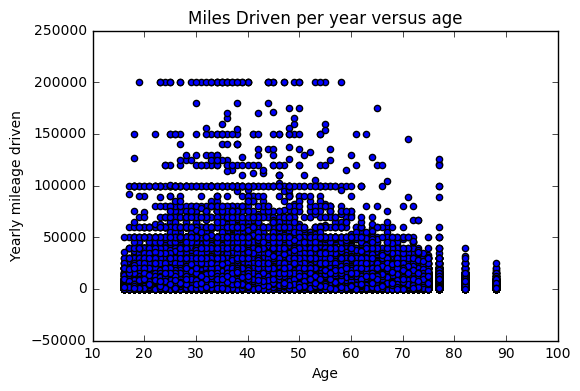

In [25]:

legit_mileage_age.plot(x='R_AGE', y='YEARMILE', kind='scatter')
plt.xlabel("Age")
plt.ylabel("Yearly mileage driven")
plt.title("Miles Driven per year versus age")
#there is something strange going on with ages over 76?- there are many values at very particular ages, why aren't
#there values in between

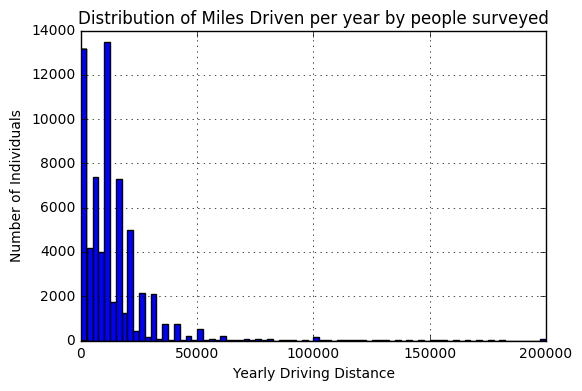

In [26]:
legit_mileage_age.hist('YEARMILE', bins=80)
plt.xlabel("Yearly Driving Distance")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Miles Driven per year by people surveyed")
#i'll maybe cut this off at 60000 miles per year driven to get an idea of the shape in the 0-50000 mpy (miles per year)
#region and see if there is anything interesting

(0, 50000)

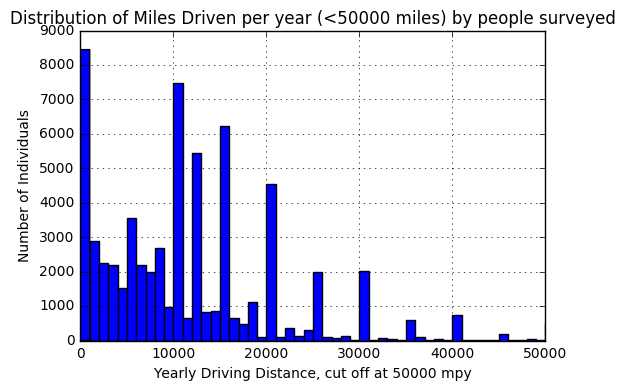

In [27]:
legit_mileage_age.hist('YEARMILE', bins=200)
plt.xlabel("Yearly Driving Distance, cut off at 50000 mpy")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Miles Driven per year (<50000 miles) by people surveyed")
plt.xlim((0, 50000))
#hmmm..are there a lot of people who dont drive anywhere? or drive very little? look at counts-is it really ~8000?
#from counts in analysis below graph, yes.

In [28]:
legit_mileage_age.R_AGE[legit_mileage_age.YEARMILE == 0].count()

#ok, a lot of people dont drive at all

4580

In [29]:
legit_mileage_age[(legit_mileage_age.YEARMILE != 0) & (legit_mileage_age.YEARMILE <1000) ].count()
#a lot of people dont drive much at all


R_AGE       3865
YEARMILE    3865
dtype: int64

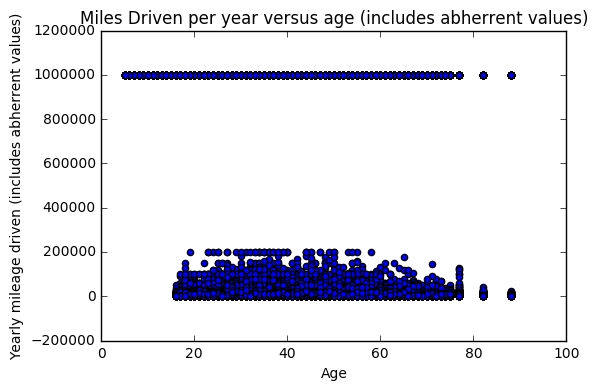

In [30]:
#this works! includes the 999999 values jsut to check if there is anything funny going on.
age_mileage.plot(x='R_AGE', y='YEARMILE', kind='scatter')
plt.xlabel("Age")
plt.ylabel("Yearly mileage driven (includes abherrent values)")
plt.title("Miles Driven per year versus age (includes abherrent values)")

I examined the age distribution of people surveyed who had legitimate values for yearly mileage

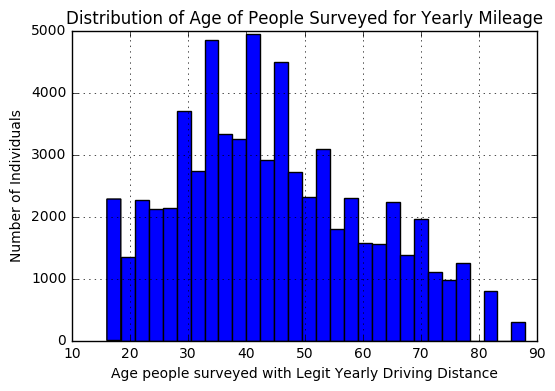

In [31]:
legit_mileage_age.hist('R_AGE', bins=30)
plt.xlabel("Age people surveyed with Legit Yearly Driving Distance")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Age of People Surveyed for Yearly Mileage")


In [32]:
#ok, the mileage reported is only for people over 16.
#but there is something weird with age reporting over ~77 or so. Not continuous age values!?
legit_mileage_age.R_AGE.min()

16

In [33]:
legit_mileage_age.R_AGE[legit_mileage_age.R_AGE >= 70].value_counts()
#yep..age is continuous until 75 - 76 is missing, 77 is back, 82 present, 88 present
#some strange filtering of the data must have happened.
#or maybe the questionaire asked ranges for example 75-79 and 77 is middle, etc. so they reported the value as continuous
#when they actually collected it as binned.

77    1245
70     848
82     797
72     580
73     526
75     512
71     507
74     469
88     299
Name: R_AGE, dtype: int64

I examined the mileage data based on age ranges to determine if it behaved as previous US DOT analyses suggested.

In [34]:
ranges = [16, 20, 35, 55, 65, 88]
labels = ["16-19", "20-34", "35-54", "55-64", "65+"]
#i used these age ranges because the DOT did. Any ideas on how else to do it?

In [35]:
legit_mileage_age["Age_range"] = pd.cut(legit_mileage_age.R_AGE, ranges, labels=labels, right=False, include_lowest=True)


/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
legit_mileage_age.columns

Index(['R_AGE', 'YEARMILE', 'Age_range'], dtype='object')

In [37]:
legit_mileage_age.Age_range.value_counts()

35-54    28837
20-34    16738
65+       8999
55-64     7934
16-19     2911
Name: Age_range, dtype: int64

In [38]:
age_range_mileage = legit_mileage_age[["YEARMILE", "Age_range"]]
#age_range_mileage

In [39]:
age_range_mileage.groupby('Age_range').mean()
#i need to figure out how to formate the means to maybe even just have no decimal places
#this analysis looks similar enough to the dot age breakdown (not sure what year theirs analyzes though), and they also
#did male and female in each age range
#right now this dataframe has no gender info, i just wanted to make sure i coudl do cut and groupby on this dataset

,YEARMILE
Age_range,
16-19,6123.833047
20-34,13929.590274
35-54,14160.088012
55-64,11284.266196
65+,7357.611957


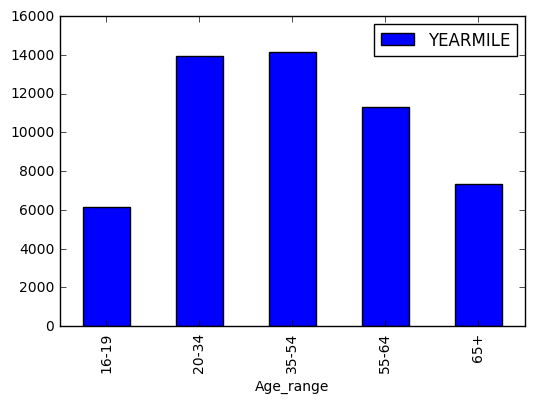

In [40]:
age_range_mileage.groupby('Age_range').mean().plot(kind="bar")

I examined the distribution of mileage based on gender to determine if men drive more than women as previously reported by the US DOT.

In [41]:
gender_mileage = driving_data[["R_SEX", "YEARMILE"]]

In [42]:
legit_gender_mileage = gender_mileage[gender_mileage.YEARMILE < 200001]

In [43]:
legit_gender_mileage.count()

R_SEX       65718
YEARMILE    65718
dtype: int64

In [44]:
legit_gender_mileage.R_SEX.value_counts()

2    33330
1    32388
Name: R_SEX, dtype: int64

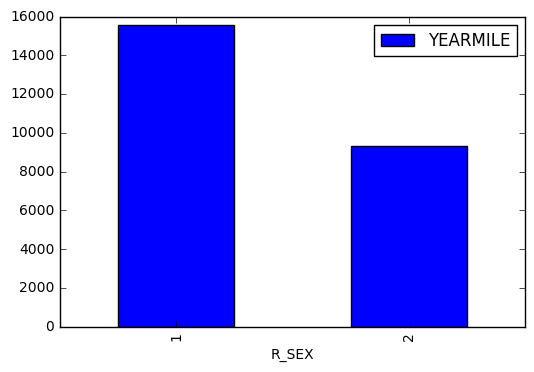

In [45]:
legit_gender_mileage.groupby('R_SEX').mean().plot(kind="bar")

In [48]:
miles_by_gender = legit_gender_mileage.groupby('R_SEX').mean()

In [52]:
miles_by_gender["Daily Miles"] = miles_by_gender.YEARMILE / 365
miles_by_gender["Daily CO2"] = miles_by_gender["Daily Miles"] * 0.4
miles_by_gender

,YEARMILE,Daily Miles,Daily CO2
R_SEX,,,
1,15581.899623,42.690136,17.076054
2,9344.776358,25.602127,10.240851
